In [1]:
from importlib import reload
import matplotlib.pyplot as plt

def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = False
    p.cfg['data_source'] = 'lines'
    p.cfg['set_phi'] = False
    p.cfg['nepochs'] = 60

    p.cfg['offset'] = 4
    p.cfg['max_position_jitter'] = 3
    p.cfg['output_prefix'] = 'lines3'

    p.cfg['gridsize'] = 2
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['probe.trainable'] = False
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 2
    
init()
from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

from ptycho import params as p
from ptycho import generate_data as init

2023-11-23 17:46:41.654867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 17:46:41.751896: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 17:46:42.128452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-11-23 17:46:42.128505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

Loading result from disk cache.
Loading result from disk cache.
1.000001
nphoton 8.962649


In [2]:
p.cfg['outer_offset_train'], p.cfg['outer_offset_test'], init.X_train.shape

(8, 20, (13448, 64, 64, 4))

## Full PINN model, best params:

In [4]:
from ptycho import params as p
p.cfg['data_source'] = 'lines'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'lines2'

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 4)    0           ['input[0][0]']                  
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['tf.math.truediv[0][0]']        
                                                             

 padded_objs_with_offsets (Lamb  (None, None, None,   0          ['padded_obj_2[0][0]',           
 da)                            1)                                'input_positions[0][0]']        
                                                                                                  
 probe_illumination (ProbeIllum  ((None, 64, 64, 1),  4096       ['padded_objs_with_offsets[0][0]'
 ination)                        (1, 64, 64, 1))                 ]                                
                                                                                                  
 pred_amplitude (Lambda)        ((None, 64, 64, 1),  0           ['probe_illumination[0][0]']     
                                 (None, 64, 64, 1))                                               
                                                                                                  
 pred_diff_channels (Lambda)    (None, 64, 64, 4)    0           ['pred_amplitude[0][1]']         
          

2023-11-23 17:47:01.587714: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-11-23 17:47:01.587731: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-11-23 17:47:01.587754: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-11-23 17:47:01.590947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-11-23 17:47:01.646033: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-11-23 17:47:01.646156: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2023-11-23 17:47:06.328457: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x7202570
2023-11-23 17:47:07.047547: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


799/799 [==============================] - 14s 13ms/step - loss: 68568112.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 12.0966 - distribution_lambda_loss: 68568112.0000 - val_loss: 22068674.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 9.7552 - val_distribution_lambda_loss: 22068674.0000 - lr: 0.0010
Epoch 2/60
799/799 [==============================] - 10s 12ms/step - loss: 21168636.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 9.6203 - distribution_lambda_loss: 21168636.0000 - val_loss: 15532644.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 8.9105 - val_distribution_lambda_loss: 15532644.0000 - lr: 0.0010
Epoch 3/60
799/799 [==============================] - 10s 12ms/step - loss: 17391776.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 9.1066 - distribution_lambda_loss: 17391776.0000 - val_loss: 15413461.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 8.8623 - val_distributi

799/799 [==============================] - 10s 12ms/step - loss: 2313024.7500 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.5604 - distribution_lambda_loss: 2313024.7500 - val_loss: 2662644.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.7936 - val_distribution_lambda_loss: 2662644.0000 - lr: 1.0000e-04
Epoch 45/60
799/799 [==============================] - 10s 12ms/step - loss: 2298863.5000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.5485 - distribution_lambda_loss: 2298863.5000 - val_loss: 2650936.5000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.7858 - val_distribution_lambda_loss: 2650936.5000 - lr: 1.0000e-04
Epoch 46/60
799/799 [==============================] - 10s 12ms/step - loss: 2274186.2500 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.5301 - distribution_lambda_loss: 2274186.2500 - val_loss: 2624607.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.7553 - val_distribution

In [6]:
from ptycho import train_pinn 

In [7]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean -0.0024742652
subtracting mean 0.0
mean scale adjustment: 4.288219
mean scale adjustment: 4.288219
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1


{'mae': (0.05354489, 0.0049299942),
 'mse': (0.0050934847, 4.4630928e-05),
 'psnr': (71.06065319355216, 91.63444406320272),
 'frc50': (165, nan)}

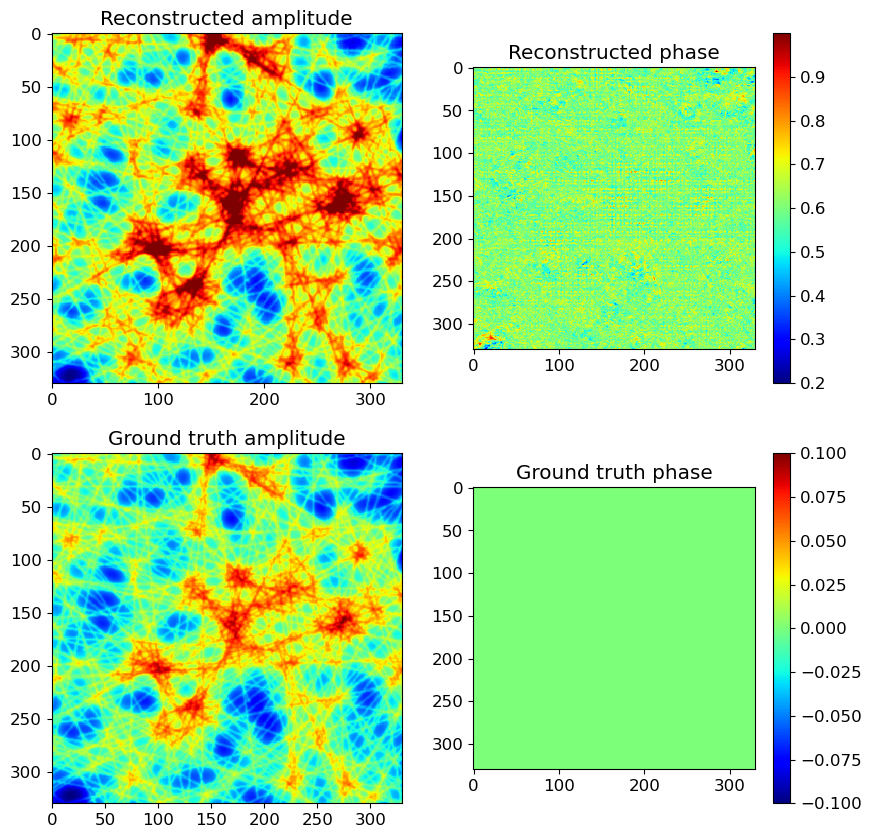

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# reconstructed amplitude images
img1 = axs[0, 0].imshow(np.absolute(stitched_obj)[0], cmap='jet', interpolation='none')
axs[0, 0].set_title('Reconstructed amplitude')

# reconstructed phase images
axs[0, 1].imshow(np.angle(stitched_obj)[0], cmap='jet')
fig.colorbar(img1, ax=axs[0, 1])
axs[0, 1].set_title('Reconstructed phase')

# ground truth amplitude images
img = axs[1, 0].imshow(np.absolute(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 0].set_title('Ground truth amplitude')

# ground truth phase images
img = axs[1, 1].imshow(np.angle(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 1].set_title('Ground truth phase')
fig.colorbar(img, ax=axs[1, 1])

phase min: -0.12547822 phase max: 0.103973426


/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/ptychoPINN-0.0.0-py3.9.egg/ptycho/evaluation.py:80: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426
phase min: -0.12547822 phase max: 0.103973426


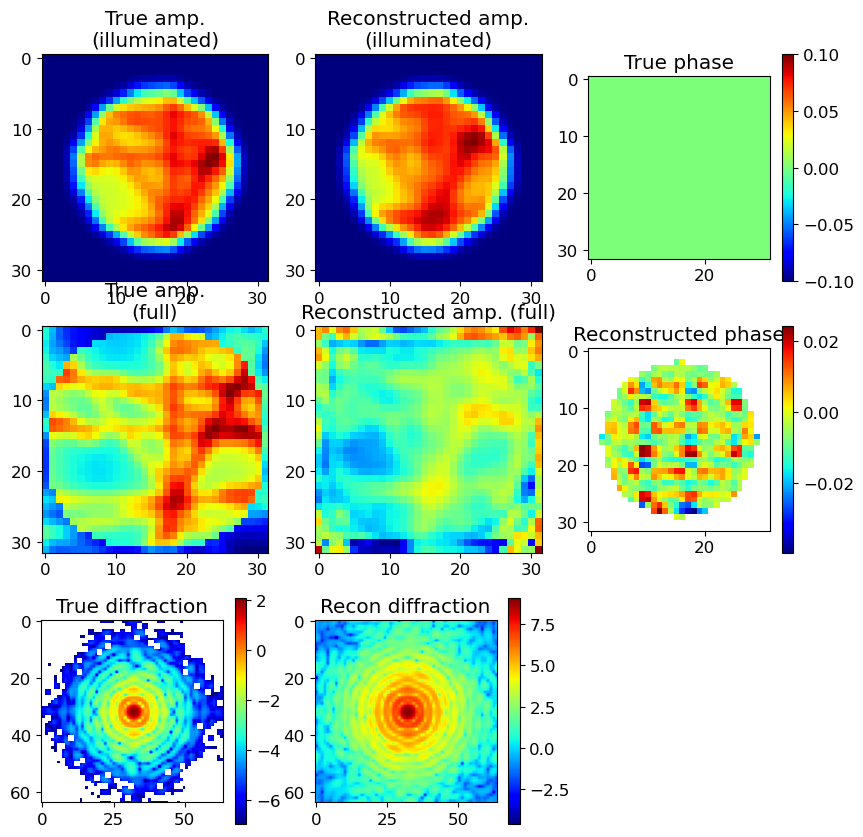

In [9]:
from ptycho import evaluation
idxs = list(range(0, 100, 10))
ptychopinn_heatmaps = [evaluation.summarize(i, pred_amp, reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


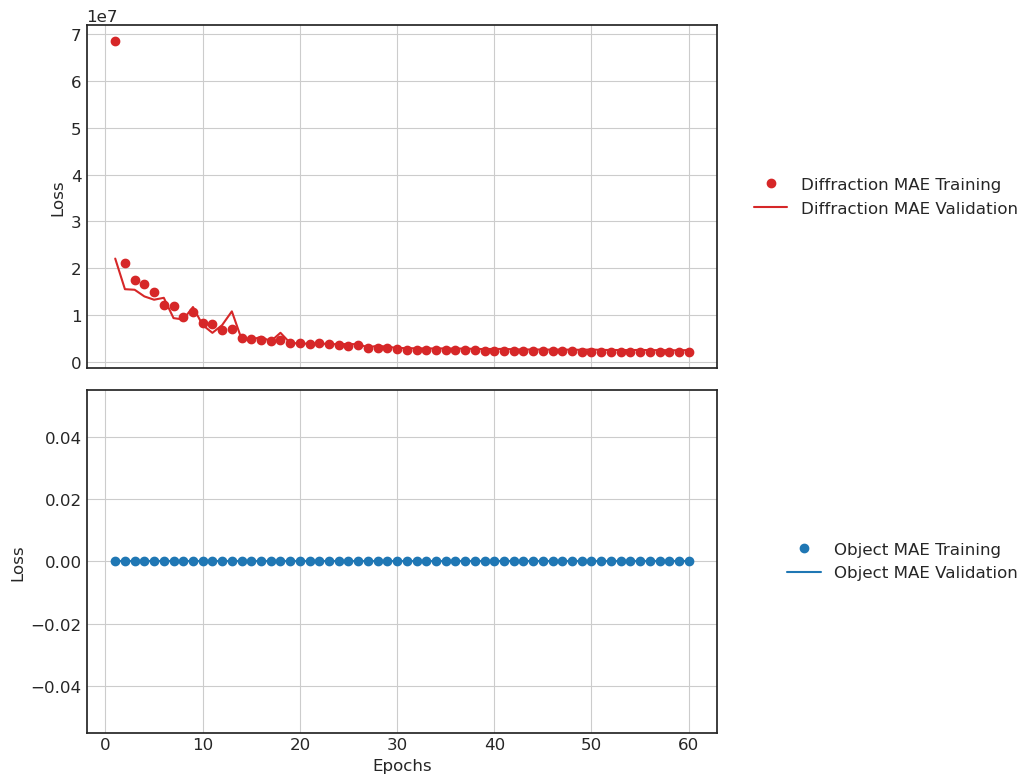

In [11]:
from ptycho import evaluation

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

## PINN, NLL, no overlap:

In [13]:
from ptycho import train_pinn

In [14]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 1.
p.cfg['mae_weight'] = 0.

reload(init)
reload(train.model)
reload(train_pinn)

# print(p.cfg)
from ptycho.generate_data import *
from ptycho.train import *;

Loading result from disk cache.
No cached result found. Calculating and caching the result.
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
input shape (None, 64, 64, 1)
1.0000081
nphoton 8.962428
input shape (None, 64, 64, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 1)    0           ['input[0][0]']                  
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['tf.math.truediv[0][0]']        
                                         

 ination)                        (1, 64, 64, 1))                 ]                                
                                                                                                  
 pred_amplitude (Lambda)        ((None, 64, 64, 1),  0           ['probe_illumination[0][0]']     
                                 (None, 64, 64, 1))                                               
                                                                                                  
 pred_diff_channels (Lambda)    (None, 64, 64, 1)    0           ['pred_amplitude[0][1]']         
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 64, 64, 1)    0           ['pred_diff_channels[0][0]']     
                                                                                                  
 trimmed_obj (Lambda)           (None, 64, 64, 1)    0           ['padded_obj_2[0][0]']           
          

2023-11-26 17:05:35.524149: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-11-26 17:05:35.524164: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-11-26 17:05:35.831263: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-11-26 17:05:35.831366: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)
819/819 [==============================] - 10s 11ms/step - loss: 17710290.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 12.0527 - distribution_lambda_loss: 17710290.0000 - val_loss: 7750457.5000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 10.8537 - val_distribution_lambda_loss: 7750457.5000 - lr: 0.0010
Epoch 2/60
819/819 [==============================] - 9s 11ms/step - loss: 5550239.5000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 9.6786 - distribution_lambda_loss: 5550239.5000 - val_loss: 4134759.2500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 9.1870 - val_distribution_lambda_loss: 4134759.2500 - lr: 0.0010
Epoch 3/60
819/819 [==============================] - 9s 11ms/step - loss: 4120911.7500 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 8.9685 - distribution_lambda_loss: 4120911.7500 - val_loss: 7495005.5000 - val_trimmed_obj_loss: 0.

819/819 [==============================] - 9s 11ms/step - loss: 308431.1875 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.2594 - distribution_lambda_loss: 308431.1875 - val_loss: 358350.5625 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.4141 - val_distribution_lambda_loss: 358350.5625 - lr: 1.0000e-04
Epoch 45/60
819/819 [==============================] - 9s 11ms/step - loss: 306934.4062 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.2501 - distribution_lambda_loss: 306934.4062 - val_loss: 379604.6875 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.4647 - val_distribution_lambda_loss: 379604.6875 - lr: 1.0000e-04
Epoch 46/60
819/819 [==============================] - 9s 11ms/step - loss: 304947.4375 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.2386 - distribution_lambda_loss: 304947.4375 - val_loss: 351193.9062 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.3474 - val_distribution_lambda_loss: 

In [15]:
from ptycho.generate_data import *
X_test.shape

TensorShape([2178, 64, 64, 1])

phase min: -3.0122302 phase max: 0.3156401


/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/ptychoPINN-0.0.0-py3.9.egg/ptycho/evaluation.py:80: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401
phase min: -3.0122302 phase max: 0.3156401


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


phase min: -3.0122302 phase max: 0.3156401


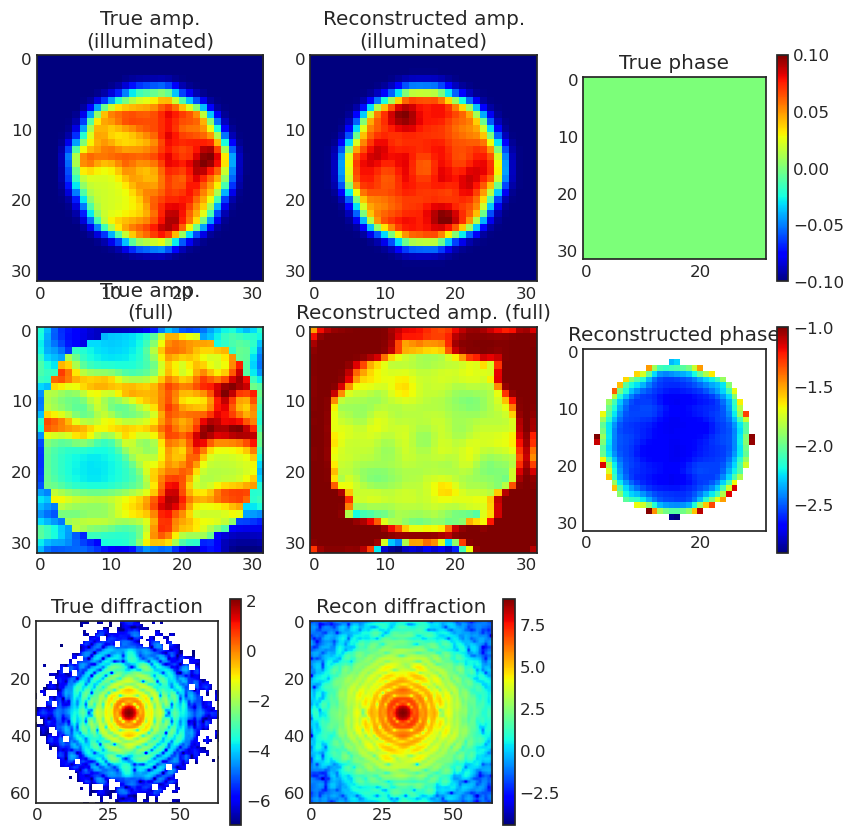

In [18]:
from ptycho import evaluation
pinn_heatmaps = [evaluation.summarize(i, train_pinn.pred_amp, train_pinn.reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

In [19]:
img_dict_ptychopinn = ptychopinn_heatmaps[0]
img_dict_pinn = pinn_heatmaps[0]

img_dict_pinn.keys()

dict_keys(['true_amp_illuminated', 'rec_amp_illuminated', 'true_phase', 'true_amp_full', 'rec_amp_full', 'rec_phase', 'true_diffraction', 'rec_diffraction'])

# Compare reconstructions of PINN with and without overlaps

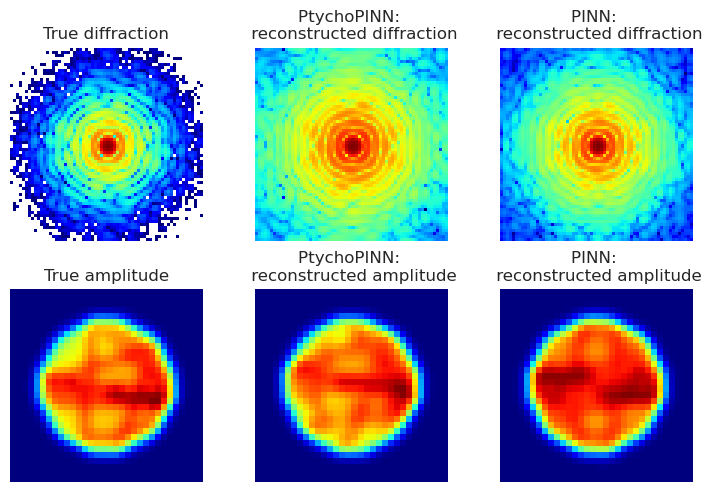

In [20]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Top row for diffraction
axs[0, 0].imshow(img_dict_ptychopinn['true_diffraction'], cmap='jet')
axs[0, 0].set_title('True diffraction')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet')
axs[0, 1].set_title('PtychoPINN: \n reconstructed diffraction')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_dict_pinn['rec_diffraction'], cmap='jet')
axs[0, 2].set_title('PINN: \n reconstructed diffraction')
axs[0, 2].axis('off')

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


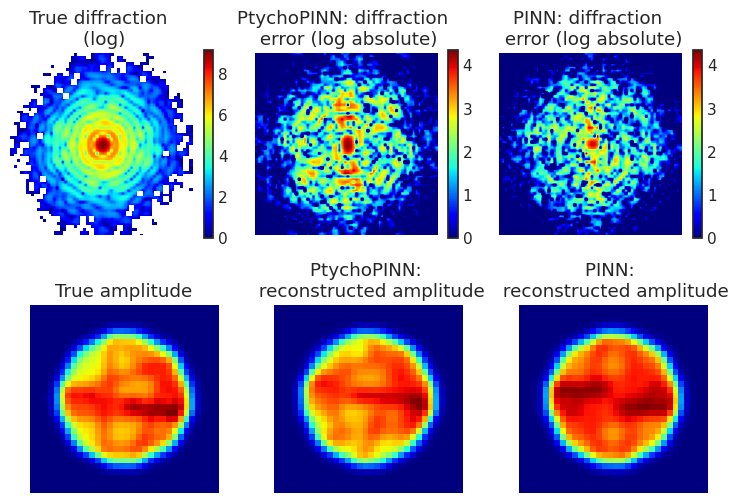

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
vmax = np.maximum(max_ptychopinn, max_pinn)

# Top row for diffraction
im1 = axs[0, 0].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[0, 0].set_title('True diffraction \n (log)')
axs[0, 0].axis('off')
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[0, 1].axis('off')
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[0, 2].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('PINN: diffraction \n error (log absolute)')
axs[0, 2].axis('off')
fig.colorbar(im3, ax=axs[0, 2])

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [22]:
def normed_ff_np(arr):
    return (f.fftshift(np.absolute(f.fft2(np.array(arr)))) / np.sqrt(h * w))

In [23]:
from ptycho import fourier as f

# More real- and diffraction-space reconstructions

diffraction reconstruction


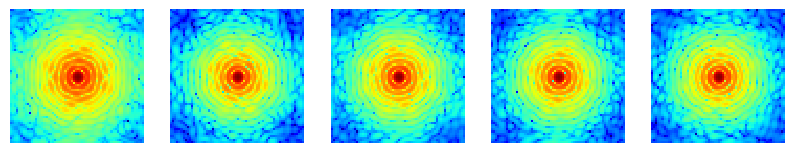

diffraction ground truth


/tmp/ipykernel_567633/2933227620.py:15: RuntimeWarning: divide by zero encountered in log
  vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])


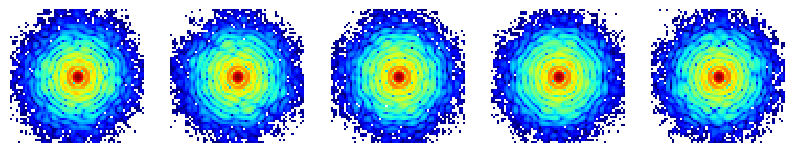

object reconstruction (amp)


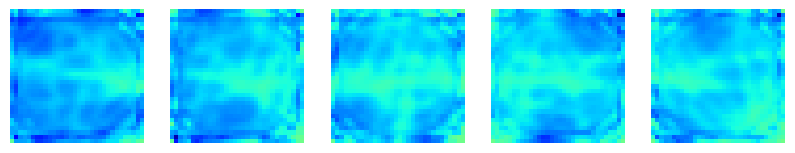

object ground truth


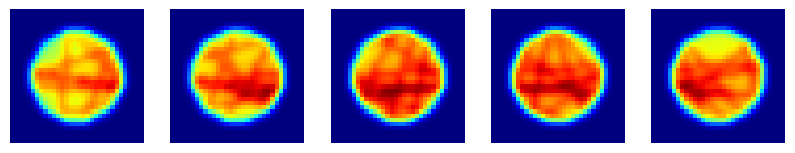

In [26]:
# !ln ../xrd_clustering/notebooks/visualization.py
from ptycho import visualization as vis
reload(vis)

off = 5
i = 0

vmin = np.min(Y_I_test[:, 16:-16, 16:-16][i:i + off])
vmax = np.max(Y_I_test[:, 16:-16, 16:-16][i:i + off])

print('diffraction reconstruction')
vis.display_imgs(np.log(np.absolute(pred_amp[:, :, :, 0]))[i:i + off])

print('diffraction ground truth')
vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])

print('object reconstruction (amp)')
vis.display_imgs(np.absolute(reconstructed_obj[:, 16:-16, 16:-16, 0])[i:i + off], vmin = vmin, vmax = vmax)
# print('object reconstruction (phase)')
# vis.display_imgs(np.angle(b[:, 16:-16, 16:-16, 0])[i:i + 10])#, vmin = vmin, vmax = vmax)
print('object ground truth')
vis.display_imgs(Y_I_test[:, 16:-16, 16:-16, 0][i:i + off], vmin = vmin, vmax = vmax)

/tmp/ipykernel_567633/266772117.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(tmp),
/tmp/ipykernel_567633/266772117.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')


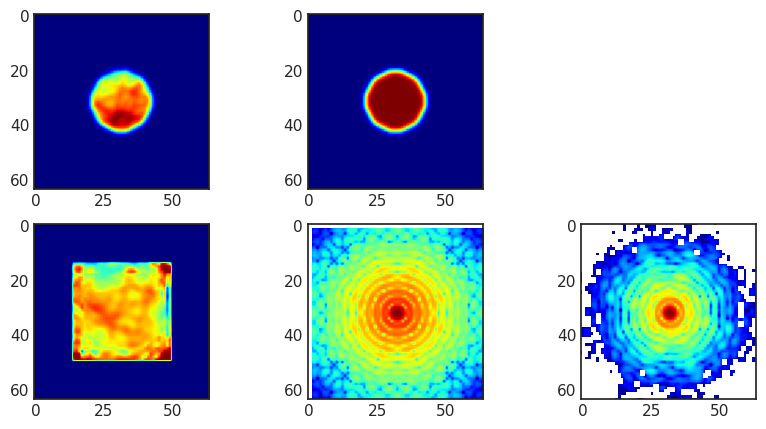

In [27]:
plt.rcParams["figure.figsize"] = (10, 5)


plt.subplot(2, 3, 1)

plt.imshow(Y_I_train[0, :, :, 0], cmap = 'jet')

plt.subplot(2, 3, 2)
plt.imshow(np.absolute(model.autoencoder.variables[-1]), cmap = 'jet')
# plt.colorbar()


plt.subplot(2, 3, 4)
plt.imshow(np.absolute(reconstructed_obj[100, :, :, 0]), cmap = 'jet')

plt.subplot(2, 3, 5)
tmp = np.absolute(f.fftshift(f.fft2(np.array(model.autoencoder.variables[-1][:, :, 0]))))
plt.imshow(np.log(tmp),
          cmap  ='jet')

plt.subplot(2, 3, 6)
plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')

# for i, v in enumerate(model.autoencoder.variables):
#     print(i, v.shape)

(2178, 64, 64, 1) 102344860.0


/tmp/ipykernel_567633/1530809169.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')


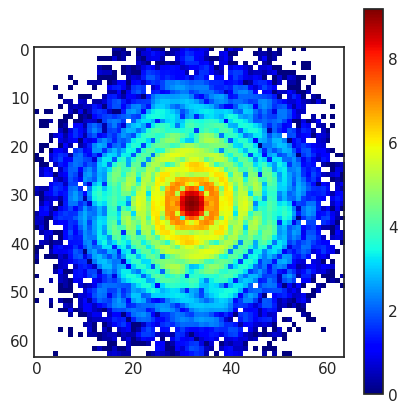

In [28]:
plt.rcParams["figure.figsize"] = (5, 5)
Itest = (X_test * p.get('intensity_scale'))**2
print(Itest.shape, np.max(Itest, axis = 1).max(axis = 1).mean())

plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')
plt.colorbar()